<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\
Last Updated: September 20, 2020\
Author: Raka Ardhi

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

**Focus on "Graded-Function" sections.**

------------

## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [1]:
# Get your import statement here
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import zscore, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset here
df = pd.read_csv('/content/nyc-rolling-sales.csv')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
# Write your syntax here
df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
# Write your syntax here
df.tail(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [5]:
# Write your syntax here
df.shape

(84548, 22)

According to this official page, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now.

In [6]:
# Drop 'Unnamed: 0' and 'EASE-MENT' features using .drop function
df = df.drop(['Unnamed: 0', 'EASE-MENT'], axis=1)

Let's view Dtype of each features in dataframe using `.info()` function.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [8]:
#First, let's check which columns should be categorical
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [9]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric.
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

Our dataset is ready for checking missing values.

In [10]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

We can fill in the missing value from one column to another, which will help us reduce missing values. Expected values:

(6, 20)

(1366, 20)

In [11]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1372 rows that can be filled in with their approximate values.

In [12]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

In [13]:
#  Check for duplicates before

print(sum(df.duplicated()))

df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


The dataframe has 765 duplicated rows (exluding the original rows).

In [14]:
df.drop_duplicates(inplace=True)

print(sum(df.duplicated()))

0


## Exploratory data analysis

Now, let's get a simple descriptive statistics with `.describe()` function for `COMMERCIAL UNITS` features.

In [15]:
df[df['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

Now, let's get a simple descriptive statistics with `.describe()` function for `RESIDENTIAL UNITS` features.

Function below are graded function. (1 Points)

In [16]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df['RESIDENTIAL UNITS'].describe()

# Graded-Funtion End

count    83783.000000
mean         1.999976
std         16.569118
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max       1844.000000
Name: RESIDENTIAL UNITS, dtype: float64

Write your findings below:

* The mean of about 2 suggests that, on average, there are around 2 residential units per entry.
* The standard deviation of 16.57 indicates a significant variation or spread in the number of residential units. The presence of outliers might be contributing to this.
* The presence of a large difference between the 75th percentile (2) and the maximum value (1,844) suggests the presence of outliers or extreme values in the data. This should be further investigated to understand the nature of these outliers and whether they are valid data points or errors.

Use `.value_counts` function to count total value of `BOROUGH` features. Expected value:

4    26548\
3    23843\
1    18102\
5     8296\
2     6994\
Name: BOROUGH, dtype: int64

In [17]:
# Write your syntax below
df['BOROUGH'].value_counts()

4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64

* Property Distribution: The highest number of properties are in borough 4, followed by borough 3, borough 1, borough 5, and borough 2, in descending order. This information indicates the distribution of properties across different boroughs.

* Borough Popularity: Borough 4 appears to be the most popular among property buyers or developers, with a significantly higher number of properties compared to other boroughs. This could be due to various factors such as location, amenities, or economic opportunities within the borough.

From here, we can calculate the mean for each Borough. Use `.mean()` function to calculate mean.

Function below are graded function. (1 Points)

In [18]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df.groupby('BOROUGH')['RESIDENTIAL UNITS'].mean()

# Graded-Funtion End

BOROUGH
1    2.276931
2    3.343580
3    2.011618
4    1.687283
5    1.230111
Name: RESIDENTIAL UNITS, dtype: float64

Borough 2 has the highest average number of residential units per property, indicating a higher residential density compared to other boroughs. This could suggest that properties in Borough 2 are more likely to be multi-unit residential buildings or apartment complexes.

From here, we can calculate the median for each Borough. Use `.median()` function to calculate median.

Function below are graded function. (1 Points)

In [19]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df.groupby('BOROUGH')['RESIDENTIAL UNITS'].median()

# Graded-Funtion End

BOROUGH
1    0.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: RESIDENTIAL UNITS, dtype: float64

Across all boroughs, the median number of residential units per property is 1. This suggests that in most boroughs, the typical property configuration includes one residential unit.

From here, we can calculate the mode for each Borough.

Function below are graded function. (1 Points)

In [20]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df.groupby('BOROUGH')['RESIDENTIAL UNITS'].agg(lambda x: x.mode().iloc[0])

# Graded-Funtion End

BOROUGH
1    0
2    1
3    1
4    1
5    1
Name: RESIDENTIAL UNITS, dtype: int64

The mode represents the most common number of residential units per property within each borough. For Borough 1, the mode is 0, indicating that the most common scenario is properties without residential units. This could suggest that Borough 1 encompasses a significant number of non-residential or commercial properties.

From here, we can calculate the Range for each Borough.

Function below are graded function. (1 Points)

In [21]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df.groupby('BOROUGH')['RESIDENTIAL UNITS'].apply(lambda x: x.max() - x.min())

# Graded-Funtion End

BOROUGH
1    1641
2     948
3     889
4    1844
5     143
Name: RESIDENTIAL UNITS, dtype: int64

The calculated ranges reflect the variability in property sizes and configurations across different boroughs. For instance, Borough 4 has the widest range of 1844 residential units, indicating a significant diversity in property sizes within the borough.

From here, we can calculate the Variance for each Borough.

Function below are graded function. (1 Points)

In [22]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df.groupby('BOROUGH')['RESIDENTIAL UNITS'].var()

# Graded-Funtion End

BOROUGH
1    496.366872
2    498.684024
3     72.958719
4    328.621156
5      5.327995
Name: RESIDENTIAL UNITS, dtype: float64

The variance values indicate the extent of variability in property sizes and configurations across different boroughs. Higher variance values suggest greater diversity in the number of residential units within properties.

From here, we can calculate the SD for each Borough.

Function below are graded function. (1 Points)

In [23]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df.groupby('BOROUGH')['RESIDENTIAL UNITS'].std()

# Graded-Funtion End

BOROUGH
1    22.279292
2    22.331234
3     8.541588
4    18.127911
5     2.308245
Name: RESIDENTIAL UNITS, dtype: float64

The standard deviation values indicate the extent of variability in property sizes and configurations across different boroughs. Higher standard deviation values suggest greater dispersion of residential unit counts within properties.

From here, we can calculate the Box Plot for each Borough.

Function below are graded function. (1 Points)

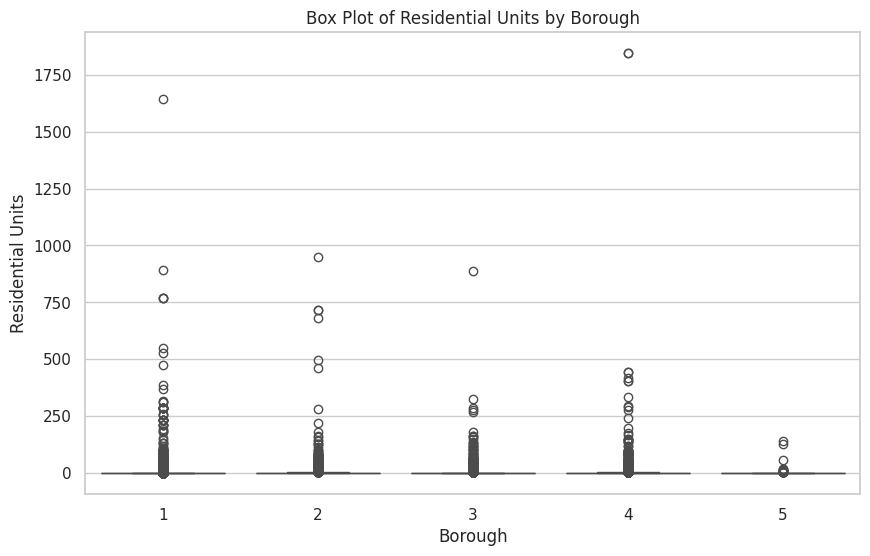

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='BOROUGH', y='RESIDENTIAL UNITS', data=df)
plt.title('Box Plot of Residential Units by Borough')
plt.xlabel('Borough')
plt.ylabel('Residential Units')
plt.show()

All boroughs have significant outliers.

From here, we can calculate the Z-score for each Borough.

Function below are graded function. (1 Points)

In [25]:
dfn = df[['BOROUGH', 'RESIDENTIAL UNITS']]
mean_by_borough = dfn.groupby('BOROUGH')['RESIDENTIAL UNITS'].mean()
std_by_borough = dfn.groupby('BOROUGH')['RESIDENTIAL UNITS'].std()
dfn['Z_SCORE'] = dfn.groupby('BOROUGH')['RESIDENTIAL UNITS'].apply(lambda x: zscore(x))
dfn.groupby('BOROUGH')['Z_SCORE'].mean()

<ipython-input-25-cdd8ba6c4f9b>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dfn['Z_SCORE'] = dfn.groupby('BOROUGH')['RESIDENTIAL UNITS'].apply(lambda x: zscore(x))
<ipython-input-25-cdd8ba6c4f9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['Z_SCORE'] = dfn.groupby('BOROUGH')['RESIDENTIAL UNITS'].apply(lambda x: zscore(x))


BOROUGH
1   -1.839945e-18
2   -3.555761e-18
3    2.145664e-17
4    4.772646e-19
5    2.549391e-17
Name: Z_SCORE, dtype: float64

The values close to zero indicate that the majority of data points within each borough's distribution of residential units are within a standard deviation or so from the mean. This can be interpreted statistically as the majority of residential properties falling within a certain range of unit counts relative to the borough's average.

Now we can analyze Probability Distibution below.

Function below are graded function. (1 Points)

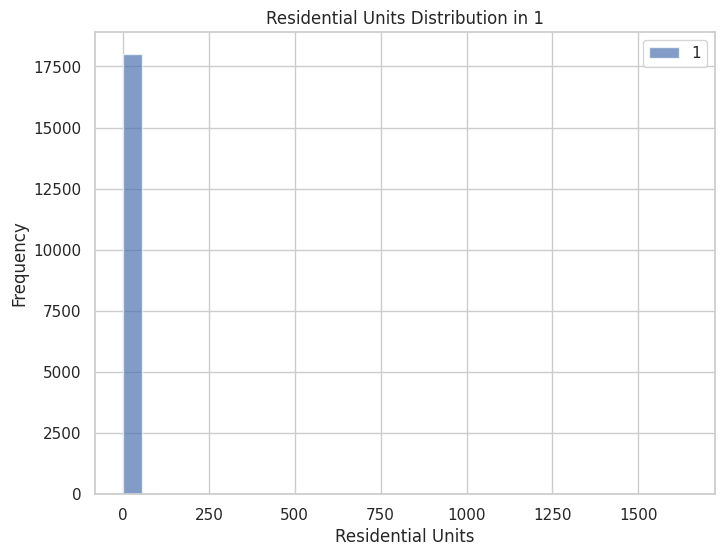

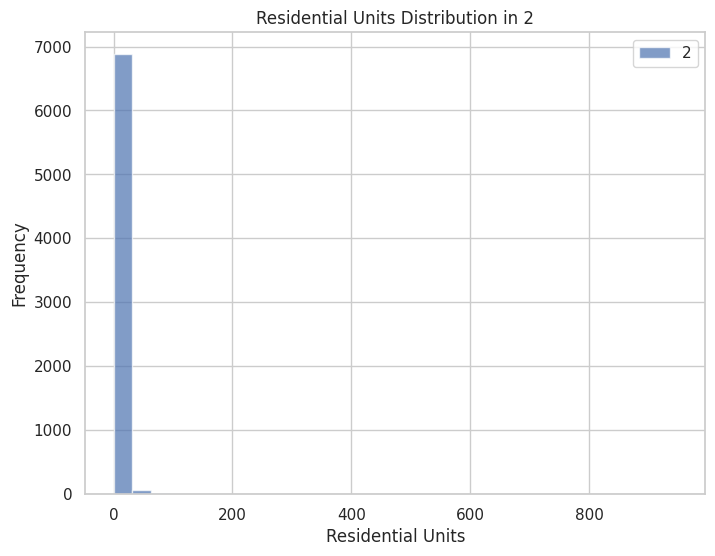

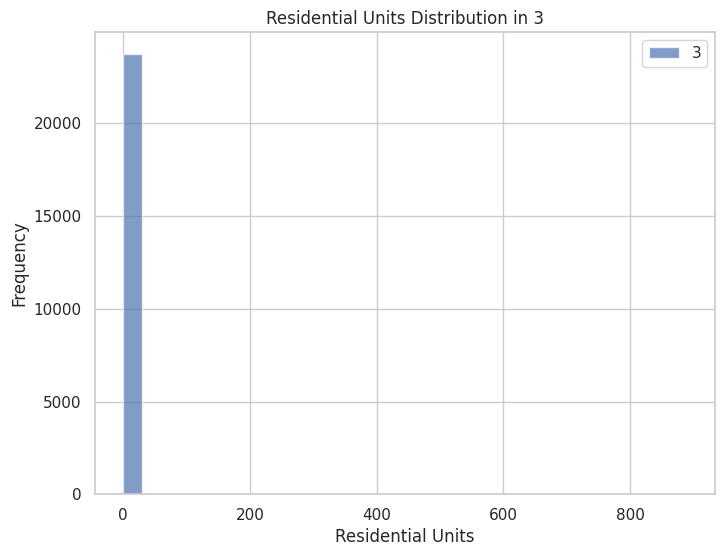

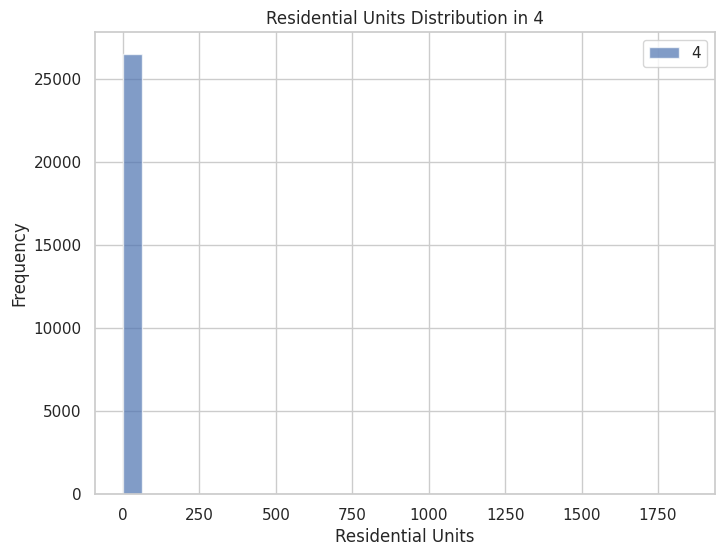

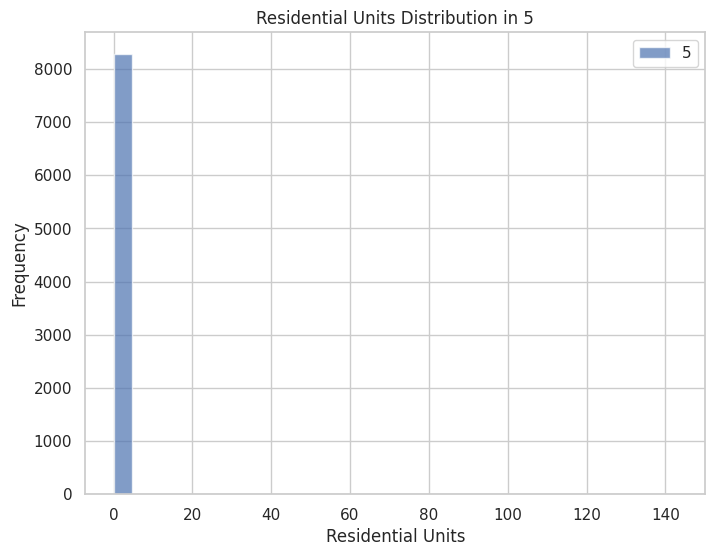

In [26]:
# Write your function below

# Graded-Funtion Begin
for borough, data in df.groupby('BOROUGH')['RESIDENTIAL UNITS']:
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=30, alpha=0.7, label=borough)
    plt.xlabel('Residential Units')
    plt.ylabel('Frequency')
    plt.title(f'Residential Units Distribution in {borough}')
    plt.legend()
    plt.grid(True)
    plt.show()
# Graded-Funtion End

When the number of residential units approaches 0, the Probability Distribution frequency becomes higher.

Now we can analyze Confidence Intervals below.

Function below are graded function. (1 Points)

In [27]:
# Write your function below

# Graded-Funtion Begin
confidence_level = 0.95

grouped_data = df.groupby('BOROUGH')['RESIDENTIAL UNITS']

for borough, data in grouped_data:
    data = data.dropna()  # Drop NaN values if any
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)
    margin_of_error = std_err * stats.t.ppf((1 + confidence_level) / 2, n - 1)
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    print(f"Borough: {borough}")
    print(f"Confidence Interval ({confidence_level * 100}%): ({ci_lower}, {ci_upper})")
    print()
# Graded-Funtion End

Borough: 1
Confidence Interval (95.0%): (1.952355591216068, 2.601505860557217)

Borough: 2
Confidence Interval (95.0%): (2.8201326519429406, 3.8670277712769625)

Borough: 3
Confidence Interval (95.0%): (1.9031929503558804, 2.120042380768558)

Borough: 4
Confidence Interval (95.0%): (1.4692114911522287, 1.905355331207271)

Borough: 5
Confidence Interval (95.0%): (1.1804334808890347, 1.2797883127464522)



* Borough 2 Appears Most Variable: Borough 2 has the widest confidence interval, indicating higher variability in residential unit counts compared to other boroughs. This suggests that residential properties in Borough 2 may have a wider range of sizes or configurations.

* Borough 4 Appears Least Variable: Borough 4 has the narrowest confidence interval among the boroughs, implying relatively less variability in residential unit counts compared to other boroughs. This may suggest more homogeneity in residential property sizes or configurations in Borough 4.

Make your Hypothesis Testing below

Function below are graded function. (1 Points)

In [28]:
# Write your function below

# Graded-Funtion Begin
df.dropna(subset=['RESIDENTIAL UNITS', 'SALE PRICE'], inplace=True)

residential_units_groups = []
for units in df['RESIDENTIAL UNITS'].unique():
    residential_units_groups.append(df[df['RESIDENTIAL UNITS'] == units]['SALE PRICE'])

f_statistic, p_value = f_oneway(*residential_units_groups)

alpha = 0.05

print("F-Statistic:", f_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean sale prices between properties with different numbers of residential units.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean sale prices between properties with different numbers of residential units.")
# Graded-Funtion End

F-Statistic: 35.99320658666425
P-value: 0.0
Reject the null hypothesis: There is a significant difference in the mean sale prices between properties with different numbers of residential units.


The rejection of the null hypothesis indicates that the number of residential units significantly influences the sale prices of properties. This finding has implications for real estate valuation, investment strategies, and market analysis.

Write your final conclusion below.

Your conclusion below are graded. (1 Points)

How do the statistical properties of residential unit distributions across boroughs influence real estate market dynamics and urban development strategies?

* Heterogeneity in Property Types: The variations in mean, median, and mode across boroughs signify the heterogeneity in property types and sizes within each area. Borough 2's higher mean suggests a prevalence of larger residential complexes, possibly indicating multifamily dwellings or apartment buildings. Conversely, Borough 5's lower mean implies a predominance of single-family homes or smaller residential structures.

* Typical Property Configuration: Median values provide insights into the typical residential unit count within each borough. Borough 1's median of 0 indicates a significant portion of properties without residential units, likely comprising commercial or mixed-use buildings. On the other hand, the median of 1 unit in other boroughs reflects a common configuration of residential properties.

* Property Size Variation: The range and variance metrics underscore the diversity in property sizes and configurations across boroughs. Borough 4's wider range suggests a more diverse mix of property sizes, possibly including both large apartment complexes and smaller dwellings. Borough 5's narrow range indicates a more uniform distribution of property sizes.

* Consistency and Variability: While Z-scores indicate consistent distributions around the mean for all boroughs, the higher variance and standard deviation in Borough 2 suggest greater variability in property sizes compared to other areas. This variability may reflect diverse housing options and demographic compositions within Borough 2.

* Outliers and Property Rarity: Significant outliers observed in all boroughs highlight the presence of unique properties with exceptionally high unit counts. These outliers may represent luxury condominiums, historic mansions, or commercial developments that contribute to the borough's distinctive character and real estate market.

* Distribution Dynamics: The probability distribution analysis revealing increased frequency as the number of residential units approaches 0 indicates a concentration of smaller properties within certain boroughs. This insight can inform urban planning efforts aimed at addressing housing affordability and promoting equitable access to housing options.

* Decision-Making and Planning: Confidence intervals provide valuable guidance for decision-making in real estate investments and urban planning initiatives. Understanding the range within which the true mean residential unit count lies enables stakeholders to assess market trends, evaluate development opportunities, and formulate effective strategies for sustainable urban growth and community development.

How does the number of residential units affect the variability in sale prices across properties, and does this relationship indicate significant differences in mean sale prices among properties with varying residential unit counts?

The rejection of the null hypothesis indicates that the number of residential units significantly influences the sale prices of properties. This finding has implications for real estate valuation, investment strategies, and market analysis.